In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
sonoma_data_clean = pd.read_csv('data/sonoma_data_clean_v2.csv')

In [4]:
sonoma_data_clean.head()

,epoch,nodeid,result_time,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,...,Reflected_PAR,ID,Height,Direc,Dist,Tree,source,Epoch_No,Epoch_Days,Epoch_datetime
0,2,3,2004-11-10 14:25:00,0,2.88311,1,37.4708,23.1832,37.2915,10135.90,...,0.00000,3.0,50.0,SW,3.0,interior,log,2,12536.010417,2004-04-27 17:15:00
1,2,4,2004-11-10 14:25:00,65535,2.91137,255,34.2577,23.9868,34.1652,69941.20,...,0.00000,4.0,46.6,SW,0.1,interior,log,2,12536.010417,2004-04-27 17:15:00
2,2,5,2004-11-10 14:25:00,65535,2.91137,255,34.5360,23.6928,34.4158,9098.04,...,21.06037,5.0,52.1,SW,0.1,interior,log,2,12536.010417,2004-04-27 17:15:00
3,2,14,2004-11-10 14:25:00,65535,2.84172,255,39.0082,21.5368,38.6538,19980.90,...,0.00000,14.0,29.3,SW,0.1,interior,log,2,12536.010417,2004-04-27 17:15:00
4,2,22,2004-11-10 14:25:00,65535,2.92571,255,32.4049,26.2800,32.5163,78857.10,...,0.00000,22.0,31.3,S,1.0,interior,log,2,12536.010417,2004-04-27 17:15:00


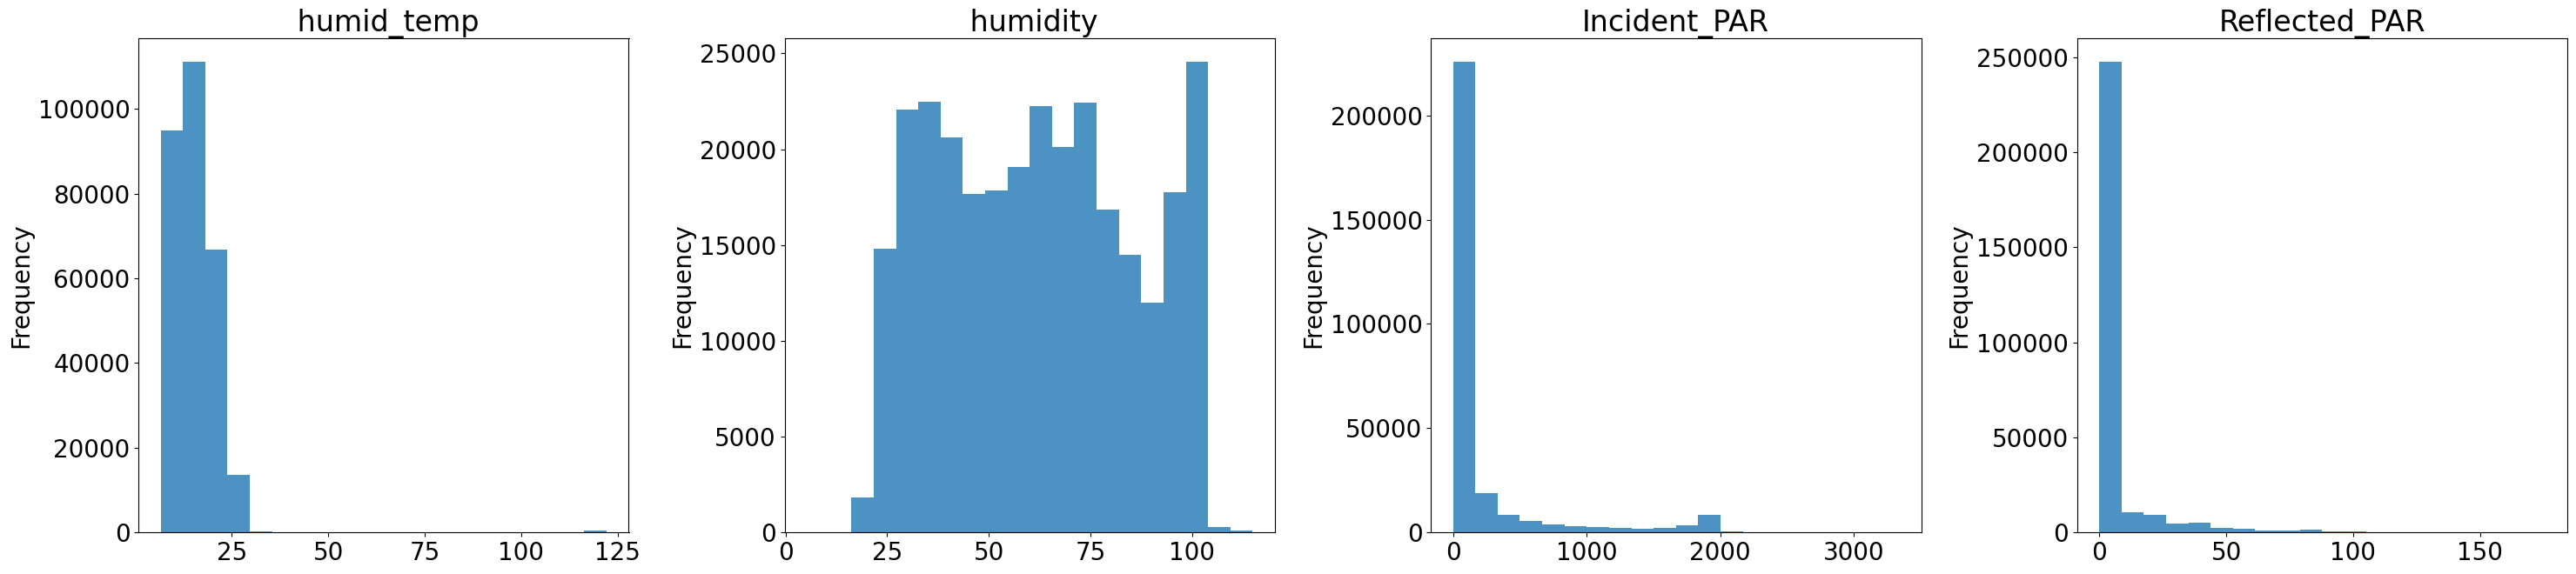

In [5]:
plt.rcParams.update({'font.size': 20})

variable_list = [' humid_temp',
                 ' humidity', 'Incident_PAR', 'Reflected_PAR']

fig, ax = plt.subplots(1,4, figsize=(30,7))
for i,var in enumerate(variable_list):
    
    sonoma_data_clean[var].plot.hist(ax=ax[i], alpha=0.8, color='tab:blue',bins=20)
    ax[i].set_title(var)
plt.tight_layout()

# Log Transform of Incident and Reflected PAR

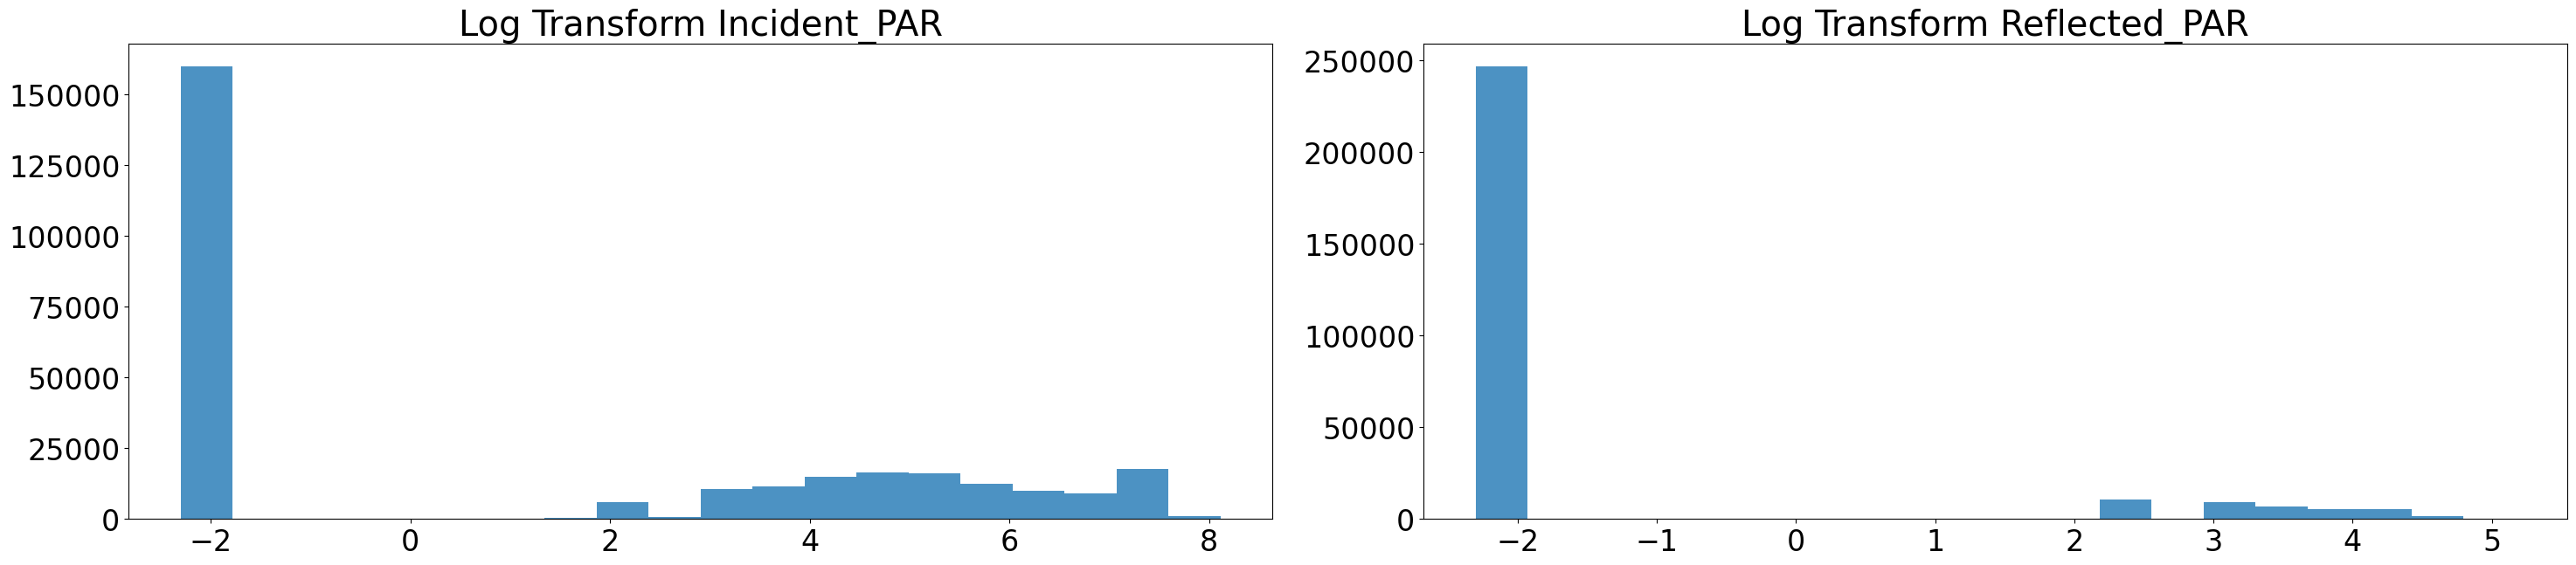

In [8]:
plt.rcParams.update({'font.size': 24})

variable_list = ['Incident_PAR', 'Reflected_PAR']

fig, ax = plt.subplots(1,2, figsize=(30,7))
for i,var in enumerate(variable_list):
    
    log_var = np.log(0.1+sonoma_data_clean[var])
    
    ax[i].hist(log_var, alpha=0.8, color='tab:blue',bins=20)
    ax[i].set_title('Log Transform ' + var)
plt.tight_layout()

We add a small constant to the values of incident PAR and reflected PAR before taking log due to the numerous 0 values in both the variables.

# Question b)

- Figure 3c) Tries to visualize the distributions in the various readings across all different nodes, ordered by heights. Ideally the set of readings captured at each height should show some variation in distribution (as presented by the boxplot) for different heights.

- Figure 3c) might obscure the temporal correlations between points in a boxplot.

- For incident PAR and Relative PAR, the box plot obscures the multimodality of the data (lots of zeros) and some other dsitribution

Try to improve by sub sampling nodes but plotting the full distribution (histogram) at larget height increments

<AxesSubplot:>

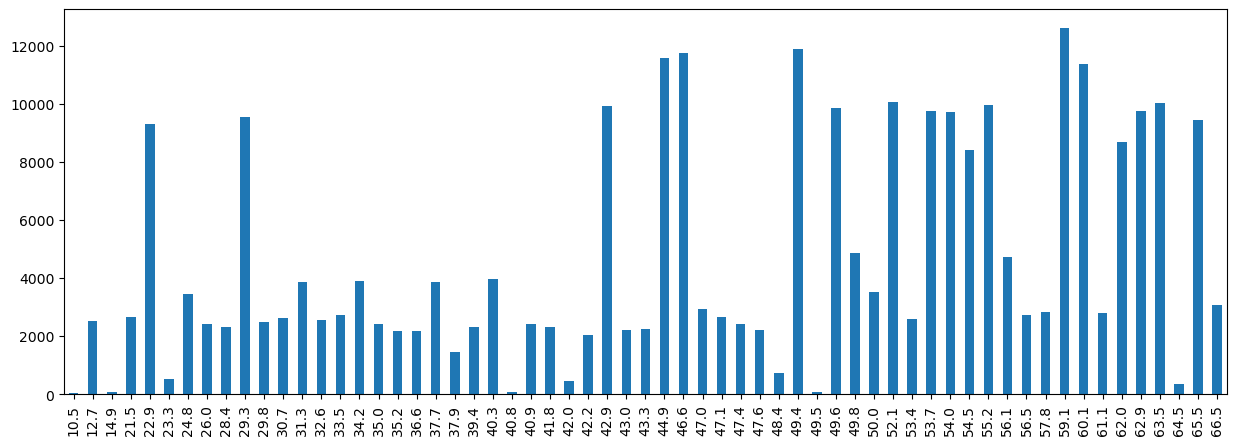

In [27]:

plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots(figsize=(15,5))
sonoma_data_clean['Height'].value_counts().sort_index().plot.bar(rot=90, ax=ax)

In [54]:
selected_heights = [29.3,32.6, 37.7,42.9, 46.6,49.4, 54.0,60.1, 65.5]

In [55]:
selected_heights[::-1]

[65.5, 60.1, 54.0, 49.4, 46.6, 42.9, 37.7, 32.6, 29.3]

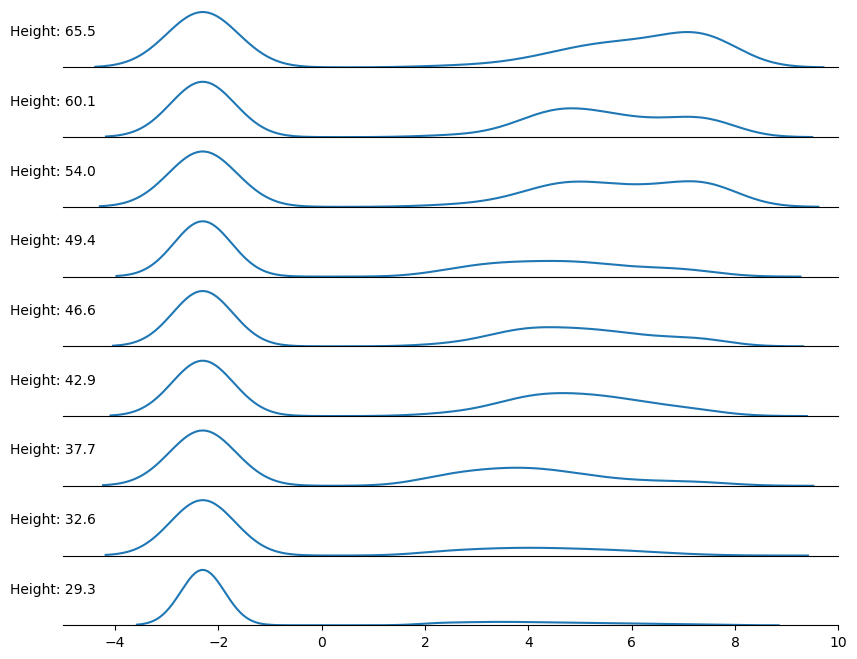

In [96]:
fig, ax = plt.subplots(len(selected_heights),1, figsize=(10,8))
for i,h in enumerate(selected_heights[::-1]):
    
    selected_data = sonoma_data_clean[sonoma_data_clean['Height']==h]
    
    #ax[i].hist(np.log(0.1+selected_data['Incident_PAR'].values),bins=15)
    sns.kdeplot(np.log(0.1+selected_data['Incident_PAR'].values),ax=ax[i])

    # Hide the right and top spines
    ax[i].spines.right.set_visible(False)
    ax[i].spines.top.set_visible(False)
    ax[i].spines.left.set_visible(False)
   # ax[i].set(ylabel=f'{h}',rotation=43)
    ax[i].set_ylabel(f'Height: {h}', rotation=0)
    ax[i].set_yticks([])
    ax[i].set_xlim(-5,10)
    if i < len(selected_heights)-1:
        ax[i].set_xticks([])
    #ax[i].set_xticks([])
    
    

# Question c)
- Improving Color
- Can try colouring by height
- Sat May 1 09:35:00 2004 − timestep 1062

In [28]:
sonoma_data_clean['Epoch_datetime']

,result_time,epoch,nodeid,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,...,Direc,Dist,Tree,nodeid_epoch,is_log,Epoch_No,Epoch_Days,Epoch_datetime,Incident_PAR,Reflected_PAR
0,2004-05-07 18:24:58.666424,2812,119,5,220.00000,2,95.3567,12.6678,92.1444,4218.18,...,WSW,3.0,interior,119_2812,False,2812,12545.767361,2004-05-07 11:25:00,78.114444,0.0
1,2004-05-07 18:24:58.805974,2812,105,129,223.00000,3,96.9957,12.6482,93.7072,9363.23,...,SW,0.1,interior,105_2812,False,2812,12545.767361,2004-05-07 11:25:00,173.393148,0.0
2,2004-05-07 18:24:59.075427,2812,113,118,222.00000,4,94.5031,12.4522,91.2718,9405.41,...,SW,0.1,interior,113_2812,False,2812,12545.767361,2004-05-07 11:25:00,174.174259,0.0
3,2004-05-07 18:24:59.355354,2812,138,5,223.00000,2,96.8828,12.6580,93.6018,9363.23,...,WSW,0.1,interior,138_2812,False,2812,12545.767361,2004-05-07 11:25:00,173.393148,0.0
4,2004-05-07 18:24:59.675467,2812,127,42,222.00000,3,97.8044,12.3836,94.4090,4702.70,...,SW,0.1,interior,127_2812,False,2812,12545.767361,2004-05-07 11:25:00,87.087037,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402240,2004-11-10 14:25:00,42,40,23,2.92571,6,38.7357,25.4764,38.7842,104000.00,...,S,3.0,edge,40_42,True,42,12536.149306,2004-04-27 20:35:00,1925.925926,0.0
402241,2004-11-10 14:25:00,73,40,200,2.81479,7,36.6807,20.5666,36.2512,104455.00,...,S,3.0,edge,40_73,True,73,12536.256944,2004-04-27 23:10:00,1934.351852,0.0
402242,2004-11-10 14:25:00,92,40,200,2.78836,7,39.8235,17.4796,39.0396,116000.00,...,S,3.0,edge,40_92,True,92,12536.322917,2004-04-28 00:45:00,2148.148148,0.0
402243,2004-11-10 14:25:00,94,40,200,2.78836,7,40.0945,17.2640,39.2832,114366.00,...,S,3.0,edge,40_94,True,94,12536.329861,2004-04-28 00:55:00,2117.888889,0.0
